<center>
    
# Stock dynamics

### Context

A stock market is where buyers and sellers trade shares of a company, and is one of the most popular ways for individuals and companies to invest money. The size of the world stock market  is now estimated to be in the trillions. The largest stock market in the world is the New York Stock Exchange (NYSE), located in New York City. About 2,800 companies are listed on the NYSE. In this problem, we'll look at the monthly stock prices of five of these companies: IBM, General Electric (GE), Procter and Gamble, Coca Cola, and Boeing. The data used in this problem comes from Infochimps.


### Data

1. Read the data files IBMStock.csv, GEStock.csv, ProcterGambleStock.csv, CocaColaStock.csv, and BoeingStock.csv.
2. Create the data frames "IBM", "GE", "ProcterGamble", "CocaCola", and "Boeing", respectively. 

Each data frame has two variables, described as follows:  

1. **Date**: the date of the stock price, always given as the first of the month.  
2. **StockPrice**: the average stock price of the company in the given month.

### Inspiration

1. What can we learn about different stocks, how the stock dynamics of these companies have changed over time?
2. What can we learn from trends? (ex: increased, decreased, cyclic)
3. Which stocks are more risky? When did they peak?
4. Is there any noticeable difference in prices during different years? what could be the reason for it? Is it same for each stock?

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from matplotlib import style
import glob
import os
import seaborn as sns



## Task 1 - Combine the data into single dataframe

In [2]:
# your code goes here
path = "../data/" # file location
all_files = glob.glob(os.path.join(path, "*.csv")) # make list of paths
all_files

['../data\\BoeingStock.csv',
 '../data\\CocaColaStock.csv',
 '../data\\GEStock.csv',
 '../data\\IBMStock.csv',
 '../data\\ProcterGambleStock.csv']

In [3]:
masterDF = pd.DataFrame() # Initialise master dataframe

for file in all_files:
    file_name = os.path.splitext(os.path.basename(file))[0]
    dfn = pd.read_csv(file)
    dfn['StockName'] = file_name
    masterDF = pd.concat([masterDF, dfn] , ignore_index=True)
    
masterDF.shape
masterDF.head()

,Date,StockPrice,StockName
0,1/1/70,27.853810,BoeingStock
1,2/1/70,22.381053,BoeingStock
2,3/1/70,23.105238,BoeingStock
3,4/1/70,21.571364,BoeingStock
4,5/1/70,18.932857,BoeingStock


In [4]:
masterDF['Date']=pd.to_datetime(masterDF['Date'])
masterDF.head()
masterDF.tail()

,Date,StockPrice,StockName
2395,2009-08-01,53.098095,ProcterGambleStock
2396,2009-09-01,55.764762,ProcterGambleStock
2397,2009-10-01,57.518182,ProcterGambleStock
2398,2009-11-01,61.297000,ProcterGambleStock
2399,2009-12-01,62.052727,ProcterGambleStock


In [5]:
masterDF = masterDF.pivot(index='Date',columns='StockName',values='StockPrice')
masterDF.head(30)

StockName,BoeingStock,CocaColaStock,GEStock,IBMStock,ProcterGambleStock
Date,,,,,
1970-01-01,27.853810,83.368095,74.253333,360.319048,111.874286
1970-02-01,22.381053,81.591053,69.976842,346.723684,111.453684
1970-03-01,23.105238,81.338095,72.158571,327.345714,108.451429
1970-04-01,21.571364,76.805909,74.252727,319.852727,106.288636
1970-05-01,18.932857,69.278571,66.665238,270.375238,73.332857
1970-06-01,15.443182,72.015455,67.593182,267.205000,48.318636
1970-07-01,13.655909,71.708182,72.696364,252.596818,51.320455
1970-08-01,13.335238,69.843810,76.146667,247.357619,51.585714
1970-09-01,17.389524,72.742857,80.462857,274.857619,52.924762


## Check the Null Values

In [6]:
masterDF.isnull()

StockName,BoeingStock,CocaColaStock,GEStock,IBMStock,ProcterGambleStock
Date,,,,,
1970-01-01,False,False,False,False,False
1970-02-01,False,False,False,False,False
1970-03-01,False,False,False,False,False
1970-04-01,False,False,False,False,False
1970-05-01,False,False,False,False,False
1970-06-01,False,False,False,False,False
1970-07-01,False,False,False,False,False
1970-08-01,False,False,False,False,False
1970-09-01,False,False,False,False,False


In [7]:
masterDF.reset_index(inplace=True)

In [8]:
masterDF['Date']=pd.to_datetime(masterDF['Date'])
masterDF['Year']=((masterDF['Date'].dt.year//1)*1)
masterDF

StockName,Date,BoeingStock,CocaColaStock,GEStock,IBMStock,ProcterGambleStock,Year
0,1970-01-01,27.853810,83.368095,74.253333,360.319048,111.874286,1970
1,1970-02-01,22.381053,81.591053,69.976842,346.723684,111.453684,1970
2,1970-03-01,23.105238,81.338095,72.158571,327.345714,108.451429,1970
3,1970-04-01,21.571364,76.805909,74.252727,319.852727,106.288636,1970
4,1970-05-01,18.932857,69.278571,66.665238,270.375238,73.332857,1970
5,1970-06-01,15.443182,72.015455,67.593182,267.205000,48.318636,1970
6,1970-07-01,13.655909,71.708182,72.696364,252.596818,51.320455,1970
7,1970-08-01,13.335238,69.843810,76.146667,247.357619,51.585714,1970
8,1970-09-01,17.389524,72.742857,80.462857,274.857619,52.924762,1970
9,1970-10-01,15.909545,78.038182,84.691818,294.466364,54.047273,1970


 ## Demand of stocks
 Generally the basic principle of stock market is if many people buy a stock of same company at a same time the price of particular stock increases since demand increases similarly if the stock of the particular company is sold by many people at the same time the stock price of that company drops Demand Drops. Basically it works on the principle of demand and supply

In [9]:
a=masterDF.groupby('Year')['BoeingStock','CocaColaStock','GEStock','ProcterGambleStock','IBMStock'].mean()

In the table given below i have calculated the average stock price of each company on yearly basis and hence tried to figure out which company stock was in demand for that particular year.More the stock price moree the demand . Less the stock price lesser is demand.

In [10]:
a

StockName,BoeingStock,CocaColaStock,GEStock,ProcterGambleStock,IBMStock
Year,,,,,
1970,18.158564,76.858923,76.265440,73.825716,297.671619
1971,18.941472,100.782786,81.934979,65.967593,321.866187
1972,23.033727,133.640557,65.516185,95.000340,387.582317
1973,19.085043,140.472156,63.170398,102.728714,344.528623
1974,16.184180,90.088934,46.343986,88.575082,208.208603
1975,24.373111,79.175945,45.320928,91.134588,202.837410
1976,36.060456,84.256910,53.270371,91.771175,264.649662
1977,42.513130,54.056913,52.554001,82.187143,265.364962
1978,51.513866,41.167732,50.083159,84.170561,267.973365


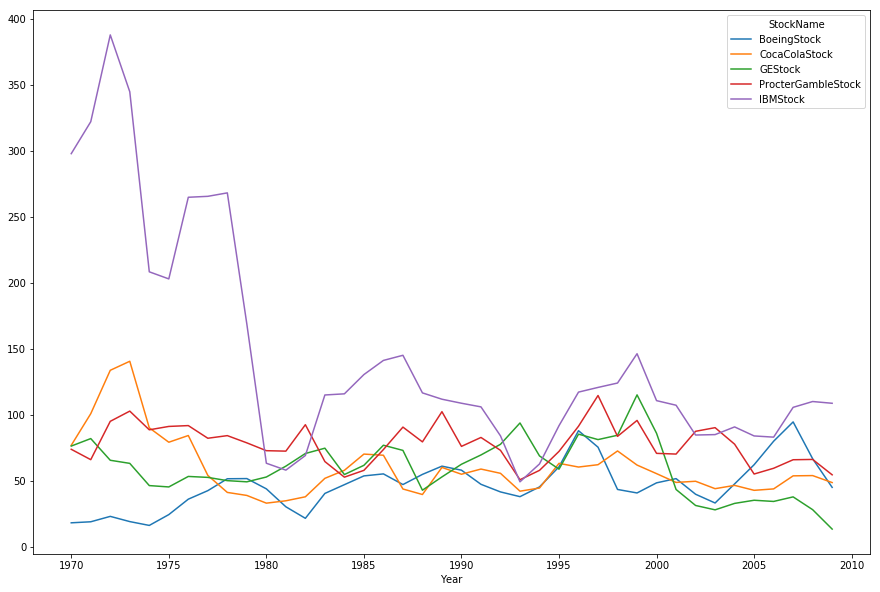

In [11]:
a.plot(figsize=[15,10])

After Observing the above table IBM stocks were clearly more in demand with respect to other companies.


## VISUALIZATION OF AVERAGE STOCK PRICE GROWTH OF IBM OVER THE YEARS
### IBM AVERAGE STOCKPRICE OVER THE YEARS

In [12]:
b=masterDF.groupby('Year')['IBMStock'].mean()

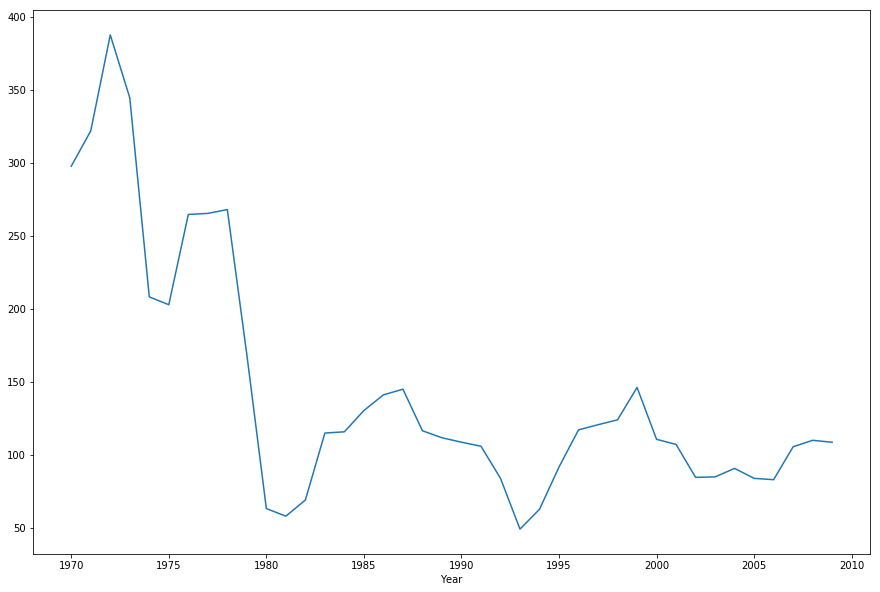

In [13]:
b.plot(figsize=[15,10])

 After Looking at the above figure it clearly shows that even in more Demand in comparison to other companies even it was not totally riskfree option for investor to invest

## GE AVERAGE STOCK PRICE GROWTH VISUALIZATION OVER THE YEARS

Text(0.5, 1.0, 'GE AVERAGE STOCK PRICE')

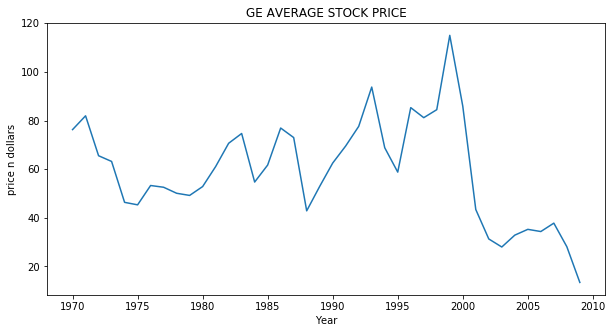

In [14]:
b=masterDF.groupby('Year')['GEStock'].mean()
b.plot(figsize=[10,5])
plt.ylabel('price n dollars')
plt.title('GE AVERAGE STOCK PRICE')

After the observing the above figure we can observe that there is a constant long term decline in stockprices.As compared to IBM even it has declined but price of GE is to low as compared to IBM

## CocaCola stock price visualization

Text(0.5, 1.0, 'CocaCola STOCK PRICE')

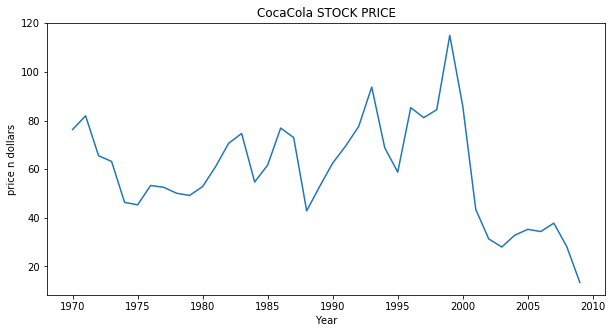

In [15]:
d=a.groupby('Year')['CocaColaStock'].mean()
b.plot(figsize=[10,5])
plt.ylabel('price n dollars')
plt.title('CocaCola STOCK PRICE')

After observing the figure the i do not find cocacola stocks very much impressive since it has went once above 100 dollars in the year between 1970-1975 after that it has grabbed a downfall

## PROCTER & GAMBLE STOCK VISUALIZATION

Text(0.5, 1.0, 'ProcterGamble STOCK PRICE')

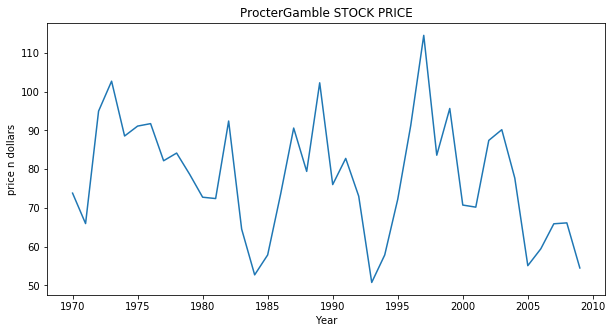

In [16]:
b=masterDF.groupby('Year')['ProcterGambleStock'].mean()
b.plot(figsize=[10,5])
plt.ylabel('price n dollars')
plt.title('ProcterGamble STOCK PRICE')

 Looking at the above figure the procter and gamble stock prices are suitable for the people who are ready for risk prone investment because looking at the trend one can make out that if investor buy this stock at a very low price there might be chances that investor might get big returns

### BOEING STOCK PRICE VISUALIZATION

Text(0.5, 1.0, 'BOEING STOCK PRICE')

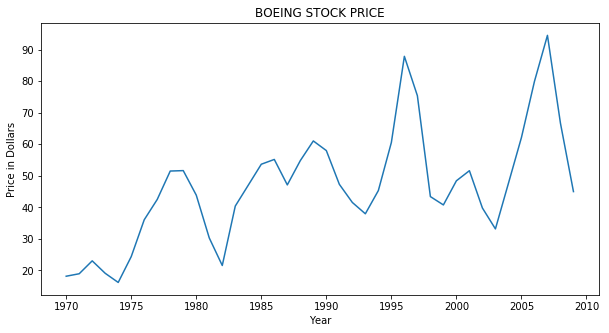

In [17]:
b=masterDF.groupby('Year')['BoeingStock'].mean()
b.plot(figsize=[10,5])
plt.ylabel('Price in Dollars')
plt.title('BOEING STOCK PRICE')

The Boeing stocks are quite unreliable like GE stocks but one plus point of Boeing stock as compared to GE is it as not fallen as low as GE. so if you ask which one is better between Boeing and GE then i would prefer Boeing stocks

## IS THERE ANY RELATION BETWEEN THE COMPANIES FOR THE INCREMENT AND DECREMENT OF STOCK PRICES
In this task i have calculated correlation between all the four companies and tried to check which companies stockprice are strongly correlated to each other

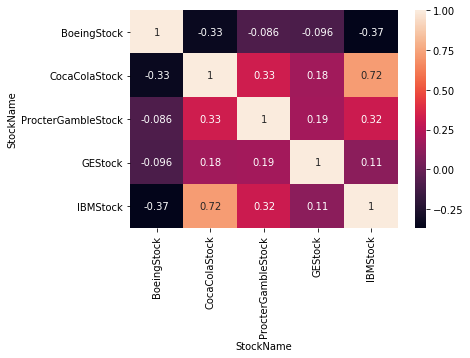

In [18]:
corr=masterDF[['BoeingStock','CocaColaStock','ProcterGambleStock','GEStock','IBMStock']].corr()
sns.heatmap(corr,annot=True)

 After observing the above figure we can observe that there is a strong correlation between IBM stock prices and coca cola stock prices.The number 0.72 in orange box indicates strong correlation.
In the next step you can carefully observe both the stocks side by side and come to the conclusion that increment and decrement of stock price are somewhat related to one another. For example you can see that sometimes the stock price of IBM drops the stock price of coca cola also drops.similarly the stock price of cocacola increases the stock price of IBM also increases

In [40]:
subset_df=masterDF[['CocaColaStock','IBMStock']]
subset_df

StockName,CocaColaStock,IBMStock
0,83.368095,360.319048
1,81.591053,346.723684
2,81.338095,327.345714
3,76.805909,319.852727
4,69.278571,270.375238
5,72.015455,267.205000
6,71.708182,252.596818
7,69.843810,247.357619
8,72.742857,274.857619
9,78.038182,294.466364


##  How much profit or loss the investor faces once the money is invested in particular company stock
Generally we are trying to find here out if a person buys a particular stock on 1 jan 1970 then how much profit percent or loss percent the investor has to face on a particular stock if bought on 1st jan or  feb 1970.
similarly i had tried to show the profit percent and loss percent of all five company from 1970-2009.

### Note:
The values displayed in the return table '+' values indicate profit and '-'indicate loss

## IBM

In [55]:
df2=masterDF[['IBMStock']]
df2['IBMreturn']=(df2/df2.shift(1)-1)*100
df2['Date']=masterDF['Date']
df2.fillna(0)

F:\ANACONDA\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
F:\ANACONDA\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


StockName,IBMStock,IBMreturn,Date
0,360.319048,0.000000,1970-01-01
1,346.723684,-3.773146,1970-02-01
2,327.345714,-5.588880,1970-03-01
3,319.852727,-2.289013,1970-04-01
4,270.375238,-15.468835,1970-05-01
5,267.205000,-1.172533,1970-06-01
6,252.596818,-5.467032,1970-07-01
7,247.357619,-2.074135,1970-08-01
8,274.857619,11.117507,1970-09-01
9,294.466364,7.134146,1970-10-01


## Boeing

In [56]:
df3=masterDF[['BoeingStock']]
df3['Boeingreturn']=(df3/df3.shift(1)-1)*100
df3['Date']=masterDF['Date']
df3.fillna(0)

F:\ANACONDA\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
F:\ANACONDA\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


StockName,BoeingStock,Boeingreturn,Date
0,27.853810,0.000000,1970-01-01
1,22.381053,-19.648145,1970-02-01
2,23.105238,3.235708,1970-03-01
3,21.571364,-6.638644,1970-04-01
4,18.932857,-12.231524,1970-05-01
5,15.443182,-18.431847,1970-06-01
6,13.655909,-11.573216,1970-07-01
7,13.335238,-2.348221,1970-08-01
8,17.389524,30.402800,1970-09-01
9,15.909545,-8.510747,1970-10-01


## CocaCola

In [57]:
df4=masterDF[['CocaColaStock']]
df4['CocaColareturn']=(df4/df4.shift(1)-1)*100
df4['Date']=masterDF['Date']
df4.fillna(0)

F:\ANACONDA\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
F:\ANACONDA\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


StockName,CocaColaStock,CocaColareturn,Date
0,83.368095,0.000000,1970-01-01
1,81.591053,-2.131562,1970-02-01
2,81.338095,-0.310031,1970-03-01
3,76.805909,-5.572034,1970-04-01
4,69.278571,-9.800467,1970-05-01
5,72.015455,3.950548,1970-06-01
6,71.708182,-0.426676,1970-07-01
7,69.843810,-2.599944,1970-08-01
8,72.742857,4.150758,1970-09-01
9,78.038182,7.279512,1970-10-01


## ProcterGamble

In [58]:
df5=masterDF[['ProcterGambleStock']]
df5['ProcterGamblereturn']=(df5/df5.shift(1)-1)*100
df5['Date']=masterDF['Date']
df5.fillna(0)

F:\ANACONDA\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
F:\ANACONDA\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


StockName,ProcterGambleStock,ProcterGamblereturn,Date
0,111.874286,0.000000,1970-01-01
1,111.453684,-0.375959,1970-02-01
2,108.451429,-2.693725,1970-03-01
3,106.288636,-1.994250,1970-04-01
4,73.332857,-31.005929,1970-05-01
5,48.318636,-34.110523,1970-06-01
6,51.320455,6.212547,1970-07-01
7,51.585714,0.516869,1970-08-01
8,52.924762,2.595772,1970-09-01
9,54.047273,2.120956,1970-10-01


## General Electric

In [54]:
df5=masterDF[['GEStock']]
df5['GEStockreturn']=df5/df5.shift(1)-1
df5['Date']=masterDF['Date']
df5.fillna(0)

F:\ANACONDA\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
F:\ANACONDA\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


StockName,GEStock,GEStockreturn,Date
0,74.253333,0.000000,1970-01-01
1,69.976842,-0.057593,1970-02-01
2,72.158571,0.031178,1970-03-01
3,74.252727,0.029022,1970-04-01
4,66.665238,-0.102185,1970-05-01
5,67.593182,0.013919,1970-06-01
6,72.696364,0.075498,1970-07-01
7,76.146667,0.047462,1970-08-01
8,80.462857,0.056683,1970-09-01
9,84.691818,0.052558,1970-10-01
